In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette() 
sns.set_style('dark')
import warnings
def ignore_warn(*arg,**kwargs):
    pass
warnings.warn = ignore_warn 
from scipy import stats
from scipy.stats import norm,skew
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [3]:
train  = pd.read_csv('train.csv')
train.head()
test = pd.read_csv('test.csv')
train.head()
train.drop('Id',axis = 1,inplace = True) 
train.head()
test.drop('Id',axis = 1,inplace = True)
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


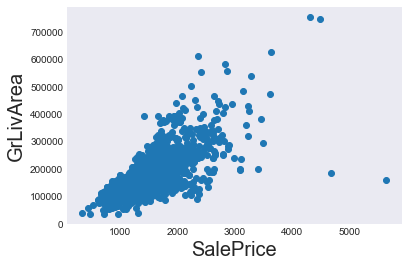

In [108]:
fig,ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('GrLivArea',fontsize = 20)
plt.xlabel('SalePrice',fontsize = 20 )
plt.show()

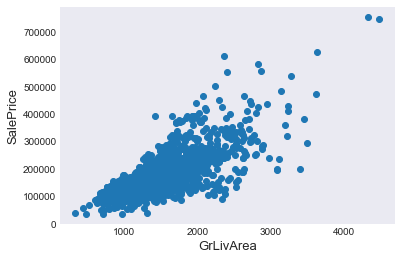

In [6]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

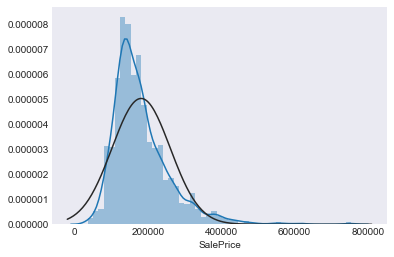

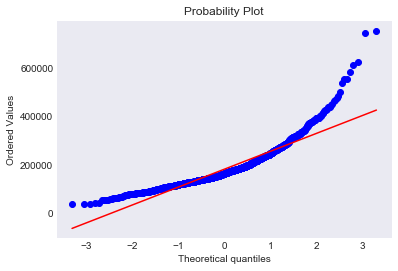

In [7]:
sns.distplot(train['SalePrice'],fit =norm)
(mu,sigma) = norm.fit(train['SalePrice'])


fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot = plt)

0   12.248
1   12.109
2   12.317
3   11.849
4   12.429
Name: SalePrice, dtype: float64

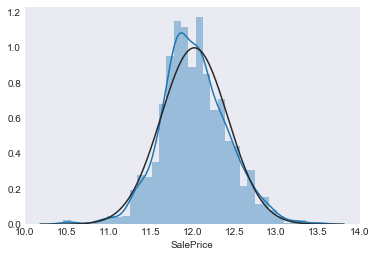

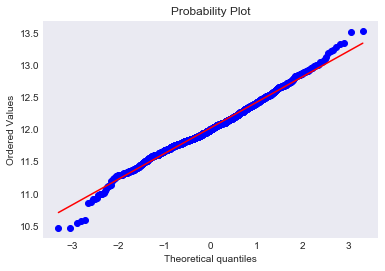

In [8]:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'],fit =norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot = plt)
train.SalePrice.head()

In [11]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train,test)).reset_index(drop = True)
all_data.drop(['SalePrice'],axis = 1,inplace = True)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.000,0.000,...,WD,0,Pave,8,856.000,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.000,0.000,...,WD,0,Pave,6,1262.000,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.000,0.000,...,WD,0,Pave,6,920.000,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.000,0.000,...,WD,0,Pave,7,756.000,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.000,0.000,...,WD,0,Pave,9,1145.000,AllPub,192,2000,2000,2008


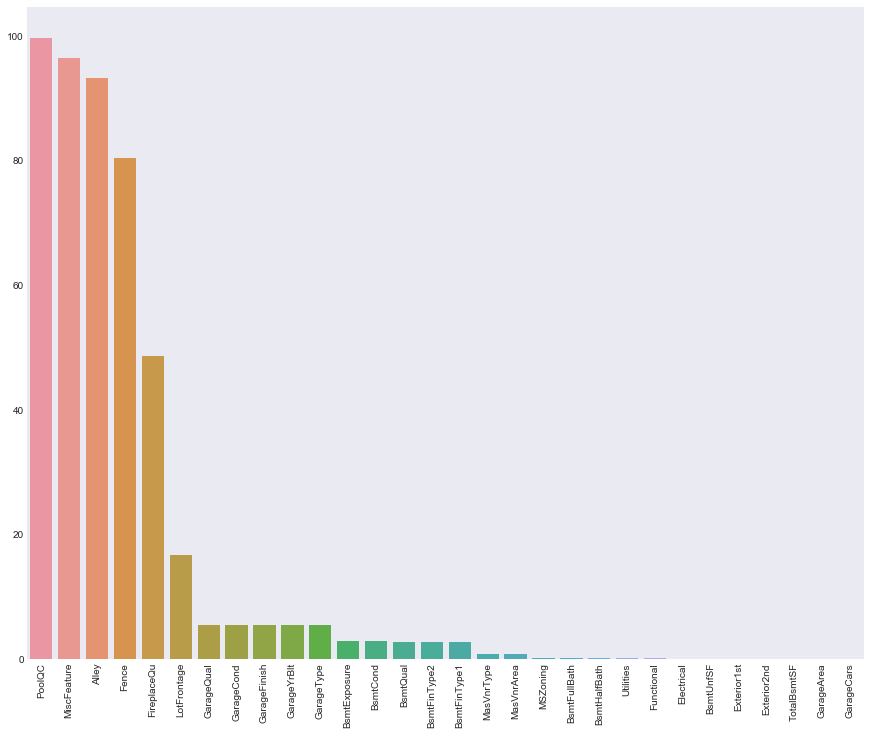

In [12]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.000,0.000,...,WD,0,Pave,8,856.000,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.000,0.000,...,WD,0,Pave,6,1262.000,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.000,0.000,...,WD,0,Pave,6,920.000,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.000,0.000,...,WD,0,Pave,7,756.000,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.000,0.000,...,WD,0,Pave,9,1145.000,AllPub,192,2000,2000,2008


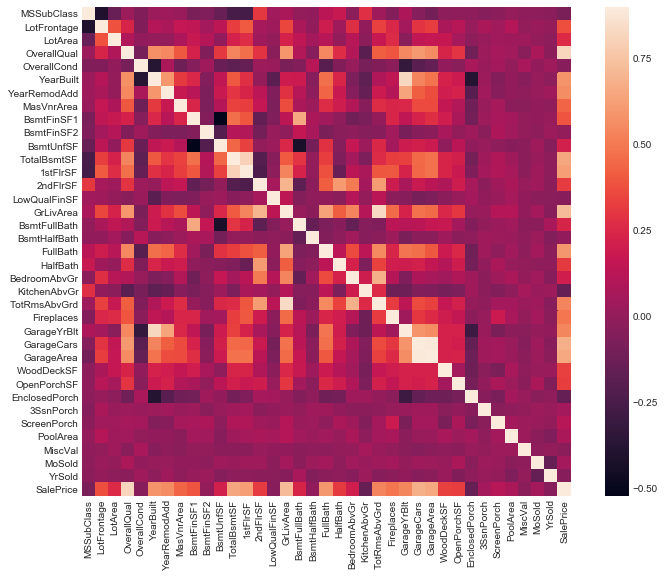

In [13]:
corrmat = train.corr()
plt.subplots(figsize = (12,9))
sns.heatmap(corrmat,vmax = 0.9,square = True)
all_data.head()

In [14]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data.PoolQC.head()  

0    None
1    None
2    None
3    None
4    None
Name: PoolQC, dtype: object

In [15]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data.MiscFeature.head()

0    None
1    None
2    None
3    None
4    None
Name: MiscFeature, dtype: object

In [16]:
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data.Alley.head()

0    None
1    None
2    None
3    None
4    None
Name: Alley, dtype: object

In [17]:
all_data['Fence'] = all_data['Fence'].fillna('None')
all_data.Fence.head()

0    None
1    None
2    None
3    None
4    None
Name: Fence, dtype: object

In [18]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')
all_data.FireplaceQu.head()

0    None
1      TA
2      TA
3      Gd
4      TA
Name: FireplaceQu, dtype: object

In [172]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
all_data.LotFrontage.head()

0   65.000
1   80.000
2   68.000
3   60.000
4   84.000
Name: LotFrontage, dtype: float64

In [19]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
    print(all_data[col].head())

0    Attchd
1    Attchd
2    Attchd
3    Detchd
4    Attchd
Name: GarageType, dtype: object
0    RFn
1    RFn
2    RFn
3    Unf
4    RFn
Name: GarageFinish, dtype: object
0    TA
1    TA
2    TA
3    TA
4    TA
Name: GarageQual, dtype: object
0    TA
1    TA
2    TA
3    TA
4    TA
Name: GarageCond, dtype: object


In [20]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    print(all_data[col].head())

0   2003.000
1   1976.000
2   2001.000
3   1998.000
4   2000.000
Name: GarageYrBlt, dtype: float64
0   548.000
1   460.000
2   608.000
3   642.000
4   836.000
Name: GarageArea, dtype: float64
0   2.000
1   2.000
2   2.000
3   3.000
4   3.000
Name: GarageCars, dtype: float64


In [185]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    print(all_data[col].head())

0   706.000
1   978.000
2   486.000
3   216.000
4   655.000
Name: BsmtFinSF1, dtype: float64
0   0.000
1   0.000
2   0.000
3   0.000
4   0.000
Name: BsmtFinSF2, dtype: float64
0   150.000
1   284.000
2   434.000
3   540.000
4   490.000
Name: BsmtUnfSF, dtype: float64
0    856.000
1   1262.000
2    920.000
3    756.000
4   1145.000
Name: TotalBsmtSF, dtype: float64
0   1.000
1   0.000
2   1.000
3   1.000
4   1.000
Name: BsmtFullBath, dtype: float64
0   0.000
1   1.000
2   0.000
3   0.000
4   0.000
Name: BsmtHalfBath, dtype: float64


In [21]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    print(all_data[col].head())

0    Gd
1    Gd
2    Gd
3    TA
4    Gd
Name: BsmtQual, dtype: object
0    TA
1    TA
2    TA
3    Gd
4    TA
Name: BsmtCond, dtype: object
0    No
1    Gd
2    Mn
3    No
4    Av
Name: BsmtExposure, dtype: object
0    GLQ
1    ALQ
2    GLQ
3    ALQ
4    GLQ
Name: BsmtFinType1, dtype: object
0    Unf
1    Unf
2    Unf
3    Unf
4    Unf
Name: BsmtFinType2, dtype: object


In [80]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data.MasVnrType.head()
all_data.MasVnrArea.head()
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.000,0.000,...,WD,0,Pave,8,856.000,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.000,0.000,...,WD,0,Pave,6,1262.000,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.000,0.000,...,WD,0,Pave,6,920.000,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.000,0.000,...,WD,0,Pave,7,756.000,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.000,0.000,...,WD,0,Pave,9,1145.000,AllPub,192,2000,2000,2008


In [22]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.000,0.000,...,WD,0,Pave,8,856.000,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.000,0.000,...,WD,0,Pave,6,1262.000,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.000,0.000,...,WD,0,Pave,6,920.000,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.000,0.000,...,WD,0,Pave,7,756.000,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.000,0.000,...,WD,0,Pave,9,1145.000,AllPub,192,2000,2000,2008


In [186]:
all_data = all_data.drop(['Utilities'],axis = 1)
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.000,0.000,...,Normal,WD,0,Pave,8,856.000,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.000,0.000,...,Normal,WD,0,Pave,6,1262.000,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.000,0.000,...,Normal,WD,0,Pave,6,920.000,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.000,0.000,...,Abnorml,WD,0,Pave,7,756.000,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.000,0.000,...,Normal,WD,0,Pave,9,1145.000,192,2000,2000,2008


In [23]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')
all_data.Functional.head()

0    Typ
1    Typ
2    Typ
3    Typ
4    Typ
Name: Functional, dtype: object

In [24]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data.Electrical.head()

0    SBrkr
1    SBrkr
2    SBrkr
3    SBrkr
4    SBrkr
Name: Electrical, dtype: object

In [25]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data.KitchenQual.head()

0    Gd
1    TA
2    Gd
3    Gd
4    Gd
Name: KitchenQual, dtype: object

In [26]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data.Exterior1st.head()
all_data.Exterior2nd.head()

0    VinylSd
1    MetalSd
2    VinylSd
3    Wd Shng
4    VinylSd
Name: Exterior2nd, dtype: object

In [27]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data.SaleType.head()

0    WD
1    WD
2    WD
3    WD
4    WD
Name: SaleType, dtype: object

In [28]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")
all_data.MSSubClass.head()

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: int64

In [29]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.000,0.000,...,WD,0,Pave,8,856.000,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.000,0.000,...,WD,0,Pave,6,1262.000,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.000,0.000,...,WD,0,Pave,6,920.000,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.000,0.000,...,WD,0,Pave,7,756.000,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.000,0.000,...,WD,0,Pave,9,1145.000,AllPub,192,2000,2000,2008


In [30]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [31]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.000,0.000,...,WD,0,Pave,8,856.000,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.000,0.000,...,WD,0,Pave,6,1262.000,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.000,0.000,...,WD,0,Pave,6,920.000,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.000,0.000,...,WD,0,Pave,7,756.000,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.000,0.000,...,WD,0,Pave,9,1145.000,AllPub,192,2000,2000,2008


In [32]:
from sklearn.preprocessing import LabelEncoder 
# LabelEncoder可以将标签分配一个0—n_classes-1之间的编码 
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols: 
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,1,3,1Fam,4,3,706.000,0.000,...,WD,0,1,8,856.000,AllPub,0,2003,2003,2
1,1262,0,0,1,3,1Fam,4,1,978.000,0.000,...,WD,0,1,6,1262.000,AllPub,298,1976,1976,1
2,920,866,0,1,3,1Fam,4,2,486.000,0.000,...,WD,0,1,6,920.000,AllPub,0,2001,2002,2
3,961,756,0,1,3,1Fam,1,3,216.000,0.000,...,WD,0,1,7,756.000,AllPub,0,1915,1970,0
4,1145,1053,0,1,4,1Fam,4,0,655.000,0.000,...,WD,0,1,9,1145.000,AllPub,192,2000,2000,2


In [33]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data.TotalSF.head()

0   2566.000
1   2524.000
2   2706.000
3   2473.000
4   3343.000
Name: TotalSF, dtype: float64

In [34]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
numeric_feats.shape
skewed_feats = all_data[numeric_feats].apply(lambda x: x.dropna()).skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

,Skew
MiscVal,21.958
PoolArea,16.907
LotArea,12.829
LowQualFinSF,12.095
3SsnPorch,11.382
LandSlope,4.978
KitchenAbvGr,4.304
BsmtFinSF2,4.147
EnclosedPorch,4.006
ScreenPorch,3.949


In [96]:
skewness = skewness[abs(skewness) > 0.75]
skewness.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, MiscVal to PoolQC
Data columns (total 1 columns):
Skew    38 non-null float64
dtypes: float64(1)
memory usage: 944.0+ bytes


0      0.173
1      0.173
2      0.173
3      0.173
4      0.173
5      0.173
6      0.173
7      0.173
8      0.173
9      0.173
10     0.173
11     0.173
12     0.173
13     0.173
14     0.173
15     0.173
16     0.173
17     0.173
18     0.173
19     0.173
20     0.173
21     0.173
22     0.173
23     0.173
24     0.173
25     0.173
26     0.173
27     0.173
28     0.173
29     0.173
        ... 
2889   0.173
2890   0.173
2891   0.173
2892   0.173
2893   0.173
2894   0.173
2895   0.173
2896   0.173
2897   0.173
2898   0.173
2899   0.173
2900   0.173
2901   0.173
2902   0.173
2903   0.173
2904   0.173
2905   0.173
2906   0.173
2907   0.173
2908   0.173
2909   0.173
2910   0.173
2911   0.173
2912   0.173
2913   0.173
2914   0.173
2915   0.173
2916   0.173
2917   0.173
2918   0.173
Name: PoolQC, Length: 2919, dtype: float64

In [101]:
from scipy.special import boxcox1p
skewed_features = skewness.index
skewed_features
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat],lam)
# y = ((1+x)**lmbda - 1) / lmbda  if lmbda != 0
#     log(1+x)                    if lmbda == 0

0   0.000
1   0.000
2   0.000
3   0.000
4   0.000
Name: MiscVal, dtype: float64
0   0.000
1   0.000
2   0.000
3   0.000
4   0.000
Name: PoolArea, dtype: float64
0   0.176
1   0.176
2   0.177
3   0.176
4   0.177
Name: LotArea, dtype: float64
0   0.000
1   0.000
2   0.000
3   0.000
4   0.000
Name: LowQualFinSF, dtype: float64
0   0.000
1   0.000
2   0.000
3   0.000
4   0.000
Name: 3SsnPorch, dtype: float64
0   0.000
1   0.000
2   0.000
3   0.000
4   0.000
Name: LandSlope, dtype: float64
0   0.135
1   0.135
2   0.135
3   0.135
4   0.135
Name: KitchenAbvGr, dtype: float64
0   0.000
1   0.000
2   0.000
3   0.000
4   0.000
Name: BsmtFinSF2, dtype: float64
0   0.000
1   0.000
2   0.000
3   0.172
4   0.000
Name: EnclosedPorch, dtype: float64
0   0.000
1   0.000
2   0.000
3   0.000
4   0.000
Name: ScreenPorch, dtype: float64
0   0.000
1   0.135
2   0.000
3   0.000
4   0.000
Name: BsmtHalfBath, dtype: float64
0   0.171
1   0.000
2   0.171
3   0.000
4   0.172
Name: MasVnrArea, dtype: float64
0   

In [48]:
all_data = pd.get_dummies(all_data)
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Utilities_AllPub,Utilities_NoSeWa
0,0.269,0.269,0.000,0.186,0.220,0.226,0.220,0.268,0.000,0.210,...,0,0,0,0,0,0,0,1,1,0
1,0.270,0.000,0.000,0.186,0.220,0.226,0.186,0.269,0.000,0.000,...,0,0,0,0,0,0,0,1,1,0
2,0.269,0.269,0.000,0.186,0.220,0.226,0.210,0.267,0.000,0.210,...,0,0,0,0,0,0,0,1,1,0
3,0.269,0.268,0.000,0.186,0.220,0.186,0.220,0.263,0.000,0.000,...,0,0,0,0,0,0,0,1,1,0
4,0.270,0.270,0.000,0.186,0.226,0.226,0.000,0.268,0.000,0.210,...,0,0,0,0,0,0,0,1,1,0


In [102]:
train = all_data[:10]
test = all_data[ntrain:]
# y_train = y_train[0:10]
train = train.iloc[:,0:10]
y_train

array([ 12.24769912,  12.10901644,  12.31717117,  11.84940484,
        12.4292202 ,  11.8706069 ,  12.63460628,  12.20607765,
        11.7745279 ,  11.67844838])

In [78]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
# import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

In [91]:
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)
lasso = make_pipeline(RobustScaler(),Lasso(alpha = 0.0005,random_state=1))
print(rmsle_cv(lasso))
# ENet = make_pipeline(RobustScaler(),ElasticNet(alpha = 0.0005,11_ratio = .9,random_stats = 3))
# KRR = KernelRidge(alpha = 0.6,kernel = 'polynomial',degree= 2,coef0 = 2.5)
# GBoost = GradienBoostingRegressor(n_estimators = 3000,learning_rate = 0.05,
#                                  max_depth = 4,max_features ='sqrt',
#                                  min_sample_leaf = 15,min_samples_split = 10,
#                                  loss = 'huber',random_state = 5)
# model_xgb = xgb.XGBRegressor(colsample_bytree = 0.4603,gamma = 0.0468,
#                              learning_rate = 0.05,max_depth = 3,
#                              min_child_weight = 1.7817,n_estimators = 2200,
#                              reg_alpha = 0.4540,reg_lambda = 0.8571,
#                              subsample = 0.5213,silent = 1,
#                              random_state = 7,nthread = -1         
#                             )

# model_lgb = lgb.LGBMRegressor(objective = 'regression',num_leaves = 5,
#                              learning_rate = 0.05,n_estimators = 720,
#                               max_bin = 55,bagging_fraction = 0.8,
#                               bagging_freq = 5,feature_fraction =0.2319,
#                               feature_fraction_seed = 9,bagging_seed = 9,
#                               min_data_in_leaf = 6,min_sum_hessian_in_leaf = 11)

[ 0.44280553  0.46445775  1.71611996  0.23262942  8.04036497]


array([  0.71019591,   0.63322505,   1.81773396,   2.2631155 ,  10.30755987])

In [229]:
class AveraingModels(BaseEstimator,RegressorMixin,TransformerMixin):
    def  __inint__(self,models):
        self.models = models
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.models]
        for model in self.models:
            models.fit(X,y)
        return self
    def predict(self,X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions,axis =1) 

TypeError: get_params() missing 1 required positional argument: 'self'

In [ ]:
averaged_models = AveragingModels(models = (ENet,GBoost,KRR,lasso))
score = rmsle_cs(averaged_models)
print(score.mean(),score.std())

In [ ]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
        self.meta_model_.fit(out_of_fold_predictions,y)
        return self
    def predict(self,X):
        meat_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis = 1)
            for base_models in self.base_models_])
        return self.meta_model_.predict(mean_features)

In [ ]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)
score = rmsle_cv(stacked_averaged_models)

In [ ]:
def rmsle(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

In [ ]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

In [ ]:
model_xgb.fit(train,y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = npexpml(model_xgb.predict(test))
print(rmsle(y_train,xgb_train_pred))

In [ ]:
print(rmsle(y_train,stacked_train_pred*0.70 + 
           xgb_train_pred * 0.15 + lgb_train_pred *0.15))
ensemble = stacked_pred * 0.70 + xgb_pred * 0.15 + lag_pred * 0.15

In [233]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('nmb.csv',index= False)

NameError: name 'test_ID' is not defined